# Read input files

In [1]:
%%time
import pandas as pd

pad = "/kaggle/input/makeparquet"
transactions = pd.read_parquet(pad+'/transactions_train.parquet')
customers = pd.read_parquet(pad+'/customers.parquet')
articles = pd.read_parquet(pad+'/articles.parquet')


CPU times: user 4.55 s, sys: 6.36 s, total: 10.9 s
Wall time: 8.53 s


# Most popular product type numbers

In [2]:
import pandas as pd

# Assuming you have three dataframes named transactions, customers, and articles

# Merge transactions with articles on 'article_id'
merged_df = pd.merge(transactions, articles, on='article_id')

# Group by 'customer_id' and 'product_type_name', count unique article_ids
repurchase_counts = merged_df.groupby(['customer_id', 'product_type_no']).agg({'article_id': 'nunique'})

# Filter for repurchases greater than 1
repurchase_counts = repurchase_counts[repurchase_counts['article_id'] > 1]

# Count the number of unique customers for each product type
repurchase_summary = repurchase_counts.groupby('product_type_no').size().reset_index(name='repurchase_count')

# Display the result
print(repurchase_summary)

     product_type_no  repurchase_count
0                 -1             11925
1                 49                42
2                 57             50459
3                 59            193391
4                 60                18
..               ...               ...
111              523                 5
112              529                45
113              532                29
114              761                42
115              762                 8

[116 rows x 2 columns]


In [3]:
repurchase_summary = repurchase_summary.sort_values(by='repurchase_count', ascending=False)
top_20_product_types = repurchase_summary.head(30)
top_20_product_names = top_20_product_types['product_type_no'].tolist()
print(top_20_product_names)

[272, 252, 265, 255, 254, 258, 253, 306, 274, 286, 298, 59, 275, 259, 273, 262, 302, 308, 264, 245, 57, 66, 267, 297, 67, 70, 304, 87, 80, 77]


# Research Question 1: Repurchase Analysis


In [4]:
# Calculate repurchase rate for each article
# Group by customer and article, and count how many times each article was purchased
repurchase_counts = transactions.groupby(['customer_id', 'article_id'])['t_dat'].count().reset_index()
repurchase_counts['t_dat'] = repurchase_counts['t_dat'] - 1

# Calculate the average repurchase rate
average_repurchase_rate = repurchase_counts['t_dat'].mean()
print(average_repurchase_rate)

0.16413289920373725


# Bulk purchases:

In [5]:
average_repurchase_rate = repurchase_counts['t_dat'].max()
print(average_repurchase_rate)

569


In [6]:
repurchase_counts[repurchase_counts['t_dat']==569]

,customer_id,article_id,t_dat
8524309,5743206735920807081,678342001,569


In [7]:
articles[articles.article_id == 678342001]

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,fabric_wool,fabric_polyester,fabric_silk,fabric_denim,fabric_linen,fabric_spandex,fabric_rayon,fabric_nylon,fabric_leather,fabric_suede
43839,678342001,678342,Lima SS.,255,T-shirt,Garment Upper body,1010016,Solid,9,Black,...,0,0,0,0,0,0,0,0,0,0


In [8]:
transactions[(transactions.customer_id == 5743206735920807081) & (transactions.article_id == 678342001)]


,t_dat,customer_id,article_id,price,sales_channel_id,season,year,month,week
1177871,2018-10-14,5743206735920807081,678342001,0.006763,1,3,-30,10,3
1177872,2018-10-14,5743206735920807081,678342001,0.006763,1,3,-30,10,3
1177873,2018-10-14,5743206735920807081,678342001,0.006763,1,3,-30,10,3
1177874,2018-10-14,5743206735920807081,678342001,0.006763,1,3,-30,10,3
1177875,2018-10-14,5743206735920807081,678342001,0.006763,1,3,-30,10,3
...,...,...,...,...,...,...,...,...,...
1178436,2018-10-14,5743206735920807081,678342001,0.006763,1,3,-30,10,3
1178437,2018-10-14,5743206735920807081,678342001,0.006763,1,3,-30,10,3
1178438,2018-10-14,5743206735920807081,678342001,0.006763,1,3,-30,10,3
1178439,2018-10-14,5743206735920807081,678342001,0.006763,1,3,-30,10,3


In [9]:
print(articles[articles.article_id == 678342001])

       article_id  product_code prod_name  product_type_no product_type_name  \
43839   678342001        678342  Lima SS.              255           T-shirt   

       product_group_name  graphical_appearance_no graphical_appearance_name  \
43839  Garment Upper body                  1010016                     Solid   

       colour_group_code colour_group_name  ...  fabric_wool fabric_polyester  \
43839                  9             Black  ...            0                0   

       fabric_silk fabric_denim  fabric_linen fabric_spandex  fabric_rayon  \
43839            0            0             0              0             0   

      fabric_nylon  fabric_leather fabric_suede  
43839            0               0            0  

[1 rows x 37 columns]


# Average time between repurchases

In [10]:
# Calculate the average time between purchases of the same item
transactions['t_dat'] = pd.to_datetime(transactions['t_dat'])
transactions = transactions.sort_values(by=['customer_id', 'article_id', 't_dat'])

# Calculate time difference between successive purchases of the same item
transactions['time_diff'] = transactions.groupby(['customer_id', 'article_id'])['t_dat'].diff()

# Calculate the average time difference for each article
average_time_between_purchases = transactions.groupby('article_id')['time_diff'].mean()
print(average_time_between_purchases.mean())


5 days 09:23:10.299972753


In [11]:
# Calculate repurchase rate for each customer
# Calculate the number of unique items purchased by each customer
unique_items = transactions['article_id'].nunique()

# Calculate the number of repurchased items by each customer
unique_customers = transactions['customer_id'].nunique()

print(unique_items)
print(unique_customers)

104547
1362281


# Calculate repurchase rate for each customer

In [12]:

# Calculate the number of unique items purchased by each customer
unique_items_per_customer = transactions.groupby('customer_id')['article_id'].nunique()

# Calculate the number of repurchased items by each customer
repurchased_items_per_customer = transactions.groupby(['customer_id', 'article_id']).size().groupby('customer_id').sum()

# Calculate the customer-specific repurchase rate
customer_repurchase_rate = (repurchased_items_per_customer / unique_items_per_customer)-1
print(unique_items_per_customer.sum())
print(repurchased_items_per_customer.sum())


print(customer_repurchase_rate.sort_values(ascending=False))

27306439
31788324
customer_id
2729025827381139556     99.0
11558794799858991958    93.0
4485518665254175540     85.0
17539785738842741120    80.0
3601599666106972342     79.0
                        ... 
8168426714032213336      0.0
8168460412275439387      0.0
8168483953316266352      0.0
8168523330546161729      0.0
9234284623732377441      0.0
Length: 1362281, dtype: float64


# Item repurchase rate

In [13]:
# Calculate the number of unique customers who purchased each item
unique_customers_per_item = transactions.groupby('article_id')['customer_id'].nunique()

# Calculate the number of repurchases for each item
repurchases_per_item = transactions.groupby(['article_id', 'customer_id']).size().groupby('article_id').sum()

# Calculate the item-specific repurchase rate
item_repurchase = repurchases_per_item - unique_customers_per_item
item_repurchase_rate = repurchases_per_item / (unique_customers_per_item)
filtered_item_repurchase_rate = item_repurchase_rate[item_repurchase_rate != 1]

print(item_repurchase.sort_values(ascending=False))
print(filtered_item_repurchase_rate.sort_values(ascending=False))
print(len(filtered_item_repurchase_rate))
print(len(item_repurchase_rate))

article_id
706016001    18036
156231001    10761
706016002     9558
160442007     7993
610776002     7628
             ...  
528746001        0
423900049        0
423900050        0
556424001        0
565200003        0
Length: 104547, dtype: int64
article_id
740299001    15.000000
704760004     8.000000
331474016     8.000000
877607001     6.333333
701784017     5.750000
               ...    
868629001     1.003831
624634005     1.003731
860885002     1.003623
805510032     1.003236
838750001     1.003205
Length: 81937, dtype: float64
81937
104547


In [14]:
test = transactions[transactions.customer_id ==3601599666106972342]
print(test)

              t_dat          customer_id  article_id     price  \
28675451 2020-07-06  3601599666106972342   685813001  0.016932   
28675452 2020-07-06  3601599666106972342   685813001  0.016932   
28675453 2020-07-06  3601599666106972342   685813001  0.016932   
28675454 2020-07-06  3601599666106972342   685813001  0.016932   
28675455 2020-07-06  3601599666106972342   685813001  0.016932   
...             ...                  ...         ...       ...   
28675526 2020-07-06  3601599666106972342   685813001  0.016932   
28675527 2020-07-06  3601599666106972342   685813001  0.016932   
28675528 2020-07-06  3601599666106972342   685813001  0.016932   
28675529 2020-07-06  3601599666106972342   685813001  0.016932   
28675530 2020-07-06  3601599666106972342   685813001  0.016932   

          sales_channel_id  season  year  month  week time_diff  
28675451                 2       2   -28      7    93       NaT  
28675452                 2       2   -28      7    93    0 days  
28675453 

# Repurchases on different dates

In [15]:
import pandas as pd

# Merge transactions and customers dataframes on 'customer_id'
merged_data = transactions.merge(customers, on='customer_id', how='inner')

# Merge the merged_data with the articles dataframe on 'article_id'
merged_data = merged_data.merge(articles, on='article_id', how='inner')

# Filter for rows where the same customer bought the same article
duplicate_sales = merged_data[merged_data.duplicated(subset=['customer_id', 'article_id'], keep=False)]

duplicate_sales_dates = duplicate_sales[['customer_id', 'article_id', 't_dat']]

print(duplicate_sales_dates)

                   customer_id  article_id      t_dat
6             8979857957419452   715624010 2019-09-05
7             8979857957419452   715624010 2019-09-05
15           32772099130663382   715624010 2020-01-19
16           32772099130663382   715624010 2020-01-22
19           39172497731037957   715624010 2019-08-13
...                        ...         ...        ...
31788203  17969406184413867807   487750043 2019-04-09
31788231  18079877935957048209   553212001 2018-12-09
31788232  18079877935957048209   553212001 2018-12-09
31788292  18297284838138651866   790940001 2019-08-21
31788293  18297284838138651866   790940001 2019-08-21

[7997298 rows x 3 columns]


In [16]:
import pandas as pd

# Merge transactions and customers dataframes on 'customer_id'
merged_data = transactions.merge(customers, on='customer_id', how='inner')

# Merge the merged_data with the articles dataframe on 'article_id'
merged_data = merged_data.merge(articles, on='article_id', how='inner')

# Group by customer_id and article_id and filter for items that are repurchased on different dates
duplicate_sales = merged_data.groupby(['customer_id', 'article_id'])['t_dat'].nunique().reset_index()
duplicate_sales = duplicate_sales[duplicate_sales['t_dat'] > 1]

print(duplicate_sales)


                   customer_id  article_id  t_dat
11              23962613628581   732842001      2
40              28847241659200   672598002      2
64              28847241659200   762846001      2
87              28847241659200   859076001      2
164             77117344919861   539723003      2
...                        ...         ...    ...
27306369  18446723086055369602   559139004      2
27306386  18446737527580148316   596400007      2
27306387  18446737527580148316   608776003      2
27306399  18446737527580148316   678942039      2
27306431  18446737527580148316   827968002      2

[1141216 rows x 3 columns]


# Calculate the number of unique articles and customers in duplicate_sales


In [17]:
unique_articles = duplicate_sales['article_id'].nunique()
unique_customers = duplicate_sales['customer_id'].nunique()

print(f"Number of unique articles in duplicate_sales: {unique_articles}")
print(f"Number of unique customers in duplicate_sales: {unique_customers}")

Number of unique articles in duplicate_sales: 63079
Number of unique customers in duplicate_sales: 377478


In [18]:
duplicate_sales = duplicate_sales.sort_values(by='t_dat', ascending=False)
print(duplicate_sales.head(10))

                   customer_id  article_id  t_dat
23079364  15590696367035504989   728162001     32
5064218    3432541823604352203   668537001     25
754325      510252261938392406   772032001     23
24968945  16862770066992317693   847180001     20
13733187   9270256441939693849   228257001     20
3300722    2251074248250852282   189616001     20
12903301   8709376079053390588   120129001     19
23262029  15715213897719939573   399223001     19
23949764  16169536517697217003   581298001     19
13923086   9391202256185024930   228257002     18


# Top 10 articles bought on different dates

What to look for

In [19]:
# column_name = 'prod_name'
# column_name = 'product_group_name'
column_name = 'product_type_name'

In [20]:
import pandas as pd

# Group by article_id in duplicate_sales and calculate the sum of t_dat and count of occurrences
article_sum_df = duplicate_sales.groupby('article_id')['t_dat'].agg(['sum', 'count']).reset_index()

# Calculate the difference between the sum and count
article_sum_df['difference'] = article_sum_df['sum'] - article_sum_df['count']

# Sort the dataframe in descending order based on the difference
article_sum_df = article_sum_df.sort_values(by='difference', ascending=False)

# Get the top 10 articles based on the 'difference' column
top_10_articles = article_sum_df.nlargest(10, 'difference')
# Merge the top 10 articles with the articles dataframe to get the 'prod_name'
top_10_articles_with_name = top_10_articles.merge(articles[['article_id', column_name]], on='article_id', how='left')
print(top_10_articles_with_name)


   article_id    sum  count  difference product_type_name
0   706016001  16333   6438        9895          Trousers
1   706016002   8906   3847        5059          Trousers
2   372860001   6501   2881        3620             Socks
3   399223001   5843   2378        3465          Trousers
4   156231001   5116   1935        3181  Underwear Tights
5   160442007   5372   2201        3171             Socks
6   464297007   5293   2333        2960  Underwear bottom
7   399256001   4519   1911        2608          Trousers
8   160442010   4221   1743        2478             Socks
9   610776002   4402   1998        2404           T-shirt


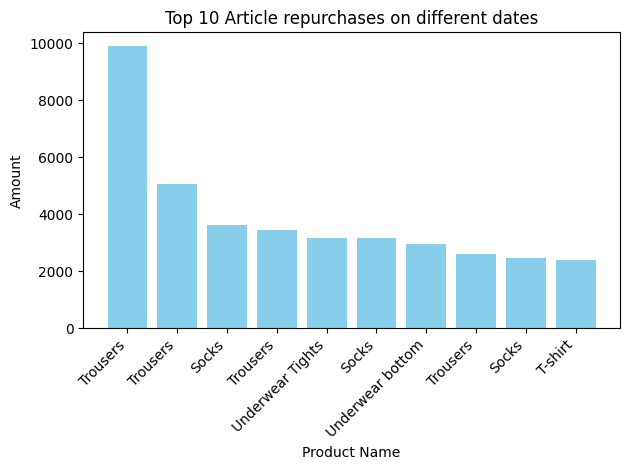

In [21]:
import matplotlib.pyplot as plt

# Assuming you already have the top_10_articles_with_name dataframe

# Plotting
# plt.figure(figsize=(14, 8))
plt.bar(top_10_articles_with_name.index, top_10_articles_with_name['difference'], color='skyblue')
plt.title('Top 10 Article repurchases on different dates')
plt.xlabel('Product Name')
plt.ylabel('Amount')
plt.xticks(top_10_articles_with_name.index, top_10_articles_with_name[column_name], rotation=45, ha='right')
plt.tight_layout()
plt.savefig(f"top10articles_{column_name}_diffdate.png")
# Show the plot
plt.show()

# Top 10 articles bought on different dates and the same date

In [22]:
repurchase_counts = transactions.groupby(['customer_id', 'article_id'])['t_dat'].count().reset_index()
repurchase_counts['t_dat'] = repurchase_counts['t_dat'] - 1
# Group by article_id in duplicate_sales and calculate the sum of t_dat and count of occurrences
article_sum_df = repurchase_counts.groupby('article_id')['t_dat'].agg(['sum', 'count']).reset_index()

# Calculate the difference between the sum and count
article_sum_df['difference'] = article_sum_df['sum'] 

# Sort the dataframe in descending order based on the difference
article_sum_df = article_sum_df.sort_values(by='difference', ascending=False)

# Get the top 10 articles based on the 'difference' column
top_10_articles = article_sum_df.nlargest(10, 'difference')
# Merge the top 10 articles with the articles dataframe to get the 'prod_name'
top_10_articles_with_name = top_10_articles.merge(articles[['article_id', column_name]], on='article_id', how='left')
print(top_10_articles_with_name)

   article_id    sum  count  difference product_type_name
0   706016001  18036  32251       18036          Trousers
1   156231001  10761  10252       10761  Underwear Tights
2   706016002   9558  25485        9558          Trousers
3   160442007   7993   9873        7993             Socks
4   610776002   7628  22571        7628           T-shirt
5   158340001   7577   8956        7577   Leggings/Tights
6   160442010   6586   8505        6586             Socks
7   228257001   6585   6775        6585  Underwear Tights
8   464297007   6471  18554        6471  Underwear bottom
9   399223001   6307  15929        6307          Trousers


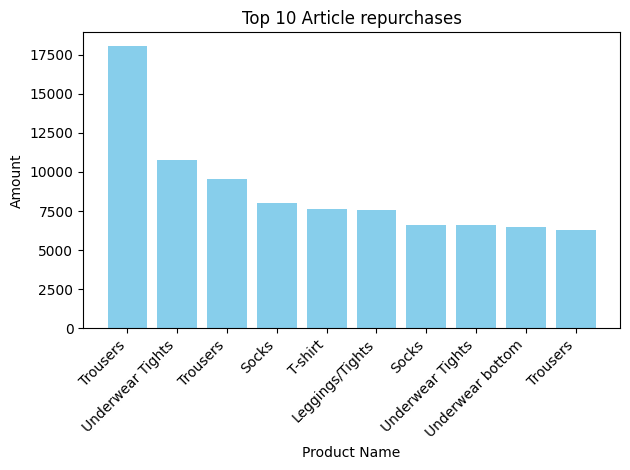

In [23]:
import matplotlib.pyplot as plt

# Assuming you already have the top_10_articles_with_name dataframe

# Plotting
# plt.figure(figsize=(14, 8))
plt.bar(top_10_articles_with_name.index, top_10_articles_with_name['difference'], color='skyblue')
plt.title('Top 10 Article repurchases')
plt.xlabel('Product Name')
plt.ylabel('Amount')
plt.xticks(top_10_articles_with_name.index, top_10_articles_with_name[column_name], rotation=45, ha='right')
plt.tight_layout()

plt.savefig(f"top10articles_{column_name}_samedate.png")
# Show the plot
plt.show()